<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Data visualization and EDA metrics with pandas

Week 2 | Lesson 2.2

---

In this lesson we will be using a boston housing market dataset. The columns of the dataset are coded as so:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset is for a different suburb of Boston.

These descriptions of shortened or coded variables are often described as "codebooks", or data dictionaries. They are the often found alongside datasets you might find online.

---

## 1. Load packages and data

In [15]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

boston_file = '/Users/austinwhaley/Desktop/DSI-SF-4/datasets/boston_housing_data/housing.csv'
boston = pd.read_csv(boston_file)

---

## 2. Describe the basic format and variables in the data:

As you recall, you can use `.head()` (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like.

The `.describe()` function will give you summary statistics for each of your variables.

The numeric data in columns has been **pre-cleaned** for you for the sake of focusing the lesson on other things (no corrupt data or string values that need to be converted to numeric). This is rarely the case in reality.

In [16]:
#boston.describe().T
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Drop unwanted columns:

The `.read_csv()` function has added a column called `Unnamed: 0`, which appears to be just the number of the rows. We already have the number id of the rows in the DataFrame's index.

In [17]:
boston.drop(['Unnamed: 0'], axis=1, inplace=True) # axis 1 = Columns, axis 0 = Rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Make the column names more descriptive

The codes are fine for some people, but I don't like having to memorize or reference the codebook whenever I want to know the meaning of a variable.

There is more than one way to do this. I am going to use the explicit `.rename()` function.

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars

In [19]:
repdict = dict(CRIM='rate_of_crime', 
                           ZN='residential_zone_pct',
                          INDUS='business_zone_pct',
                          CHAS='borders_river',
                          NOX='oxide_concentration',
                          RM='average_rooms',
                          AGE='owner_occup_pct',
                          DIS='distance_to_work',
                          RAD='access_to_hwy',
                          TAX='property_tax',
                          PTRATIO='student_teacher_ratio',
                          B='black_stat',
                          LSTAT='pct_undercase',
                          MEDV='median_value')

boston.rename(columns=repdict, inplace=True)
boston.head()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,distance_to_work,access_to_hwy,property_tax,student_teacher_ratio,black_stat,pct_undercase,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Describe the variables

Use the `.describe()` function here. What are some, if any, oddities you notice about the variables.

In [20]:
boston.describe()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,distance_to_work,access_to_hwy,property_tax,student_teacher_ratio,black_stat,pct_undercase,median_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are some potential outliers in variables here:

1. black_stat has at least one outlier at the min end of the range.
2. owner_occup_pct has at least one outlier at the min end.
3. business_zone_pct might have an outlier at the min end.
4. rate_of_crime has at least one outlier at the max end.

---

## 3. Plot variables with potential outliers using seaborn boxplots.

Some notes on seaborn's boxplot keyword argument options that I'm going to use:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent
    
    

<function matplotlib.pyplot.show>

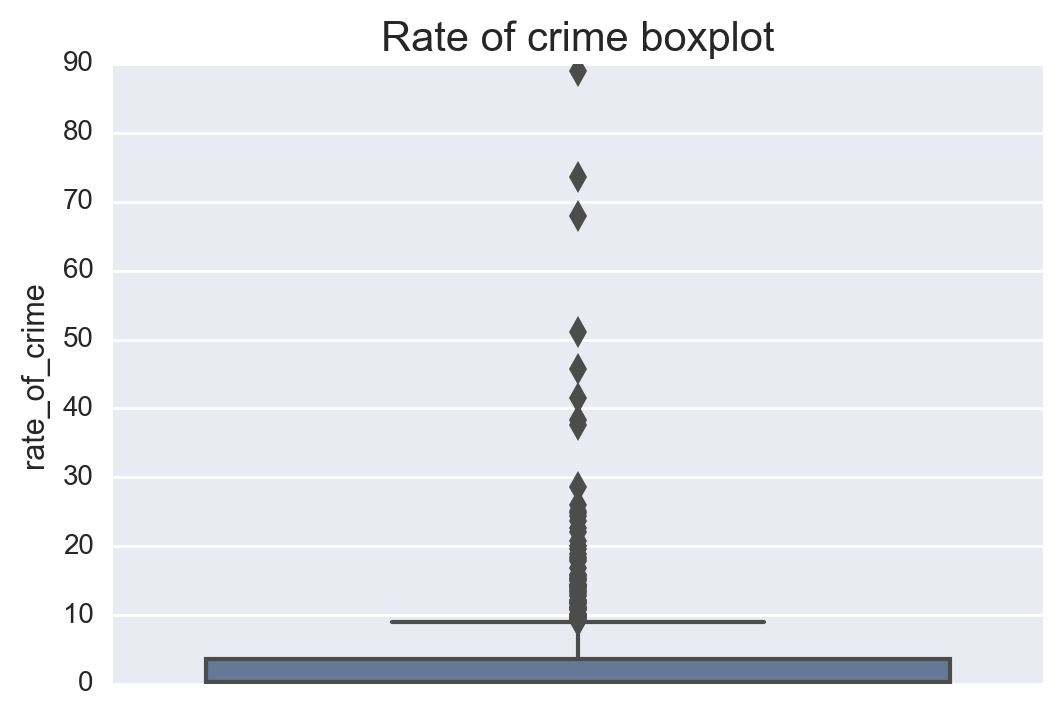

In [26]:
#Using Seaborn to use boxplot
fig = plt.figure(figsize=(6,4))
axis = fig.gca() #Get-Current-Axis
axis = sns.boxplot(boston['rate_of_crime'], orient='v', fliersize=8, linewidth=1.5, saturation=0.5, ax=axis)

axis.set_title('Rate of crime boxplot', fontsize=15)

plt.show

<function matplotlib.pyplot.show>

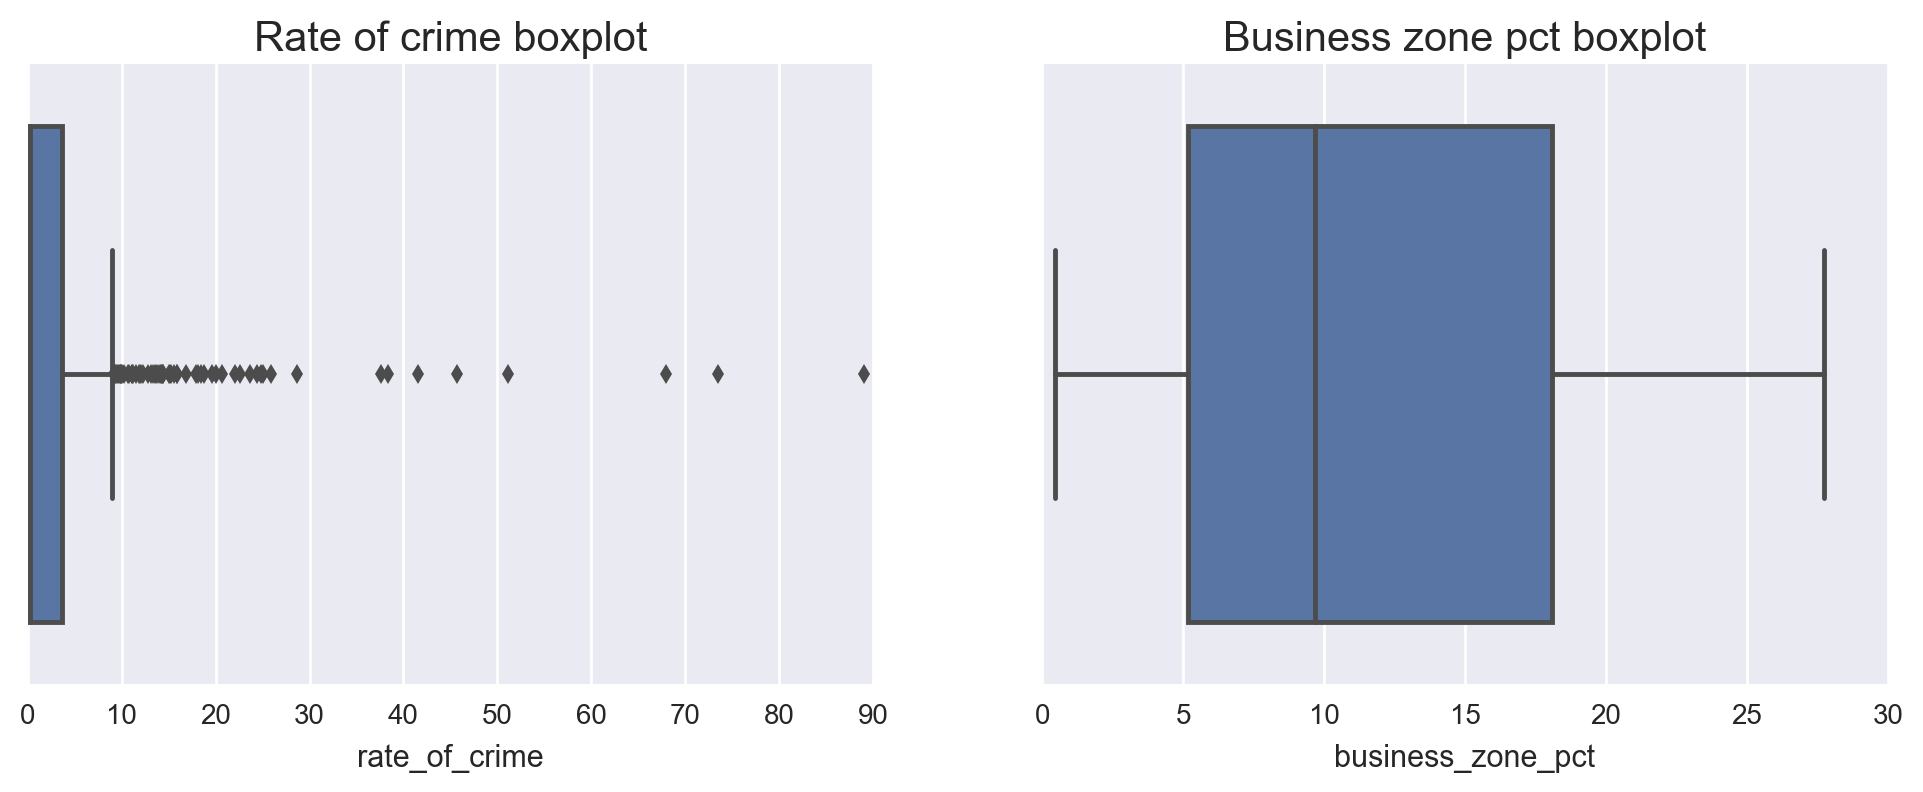

In [28]:
#Assign figure shape
fig, axis_array = plt.subplots(1, 2, figsize=(12,4)) #1 Row, 2 Columns, figsize param

#Return all axis objects
axis1, axis2 = axis_array[0], axis_array[1]

#Assign Axis Plots
axis1 = sns.boxplot(boston['rate_of_crime'], ax=axis1)
axis2 = sns.boxplot(boston['business_zone_pct'], ax=axis2)

#Rename axis titles
axis1.set_title('Rate of crime boxplot', fontsize=15)
axis2.set_title('Business zone pct boxplot', fontsize=15)

#Force Show of plots
plt.show

---

## 4. Plot all the variables on boxplots together.

Let's try this first with the variables as they are, using a horizontal boxplot with seaborn.

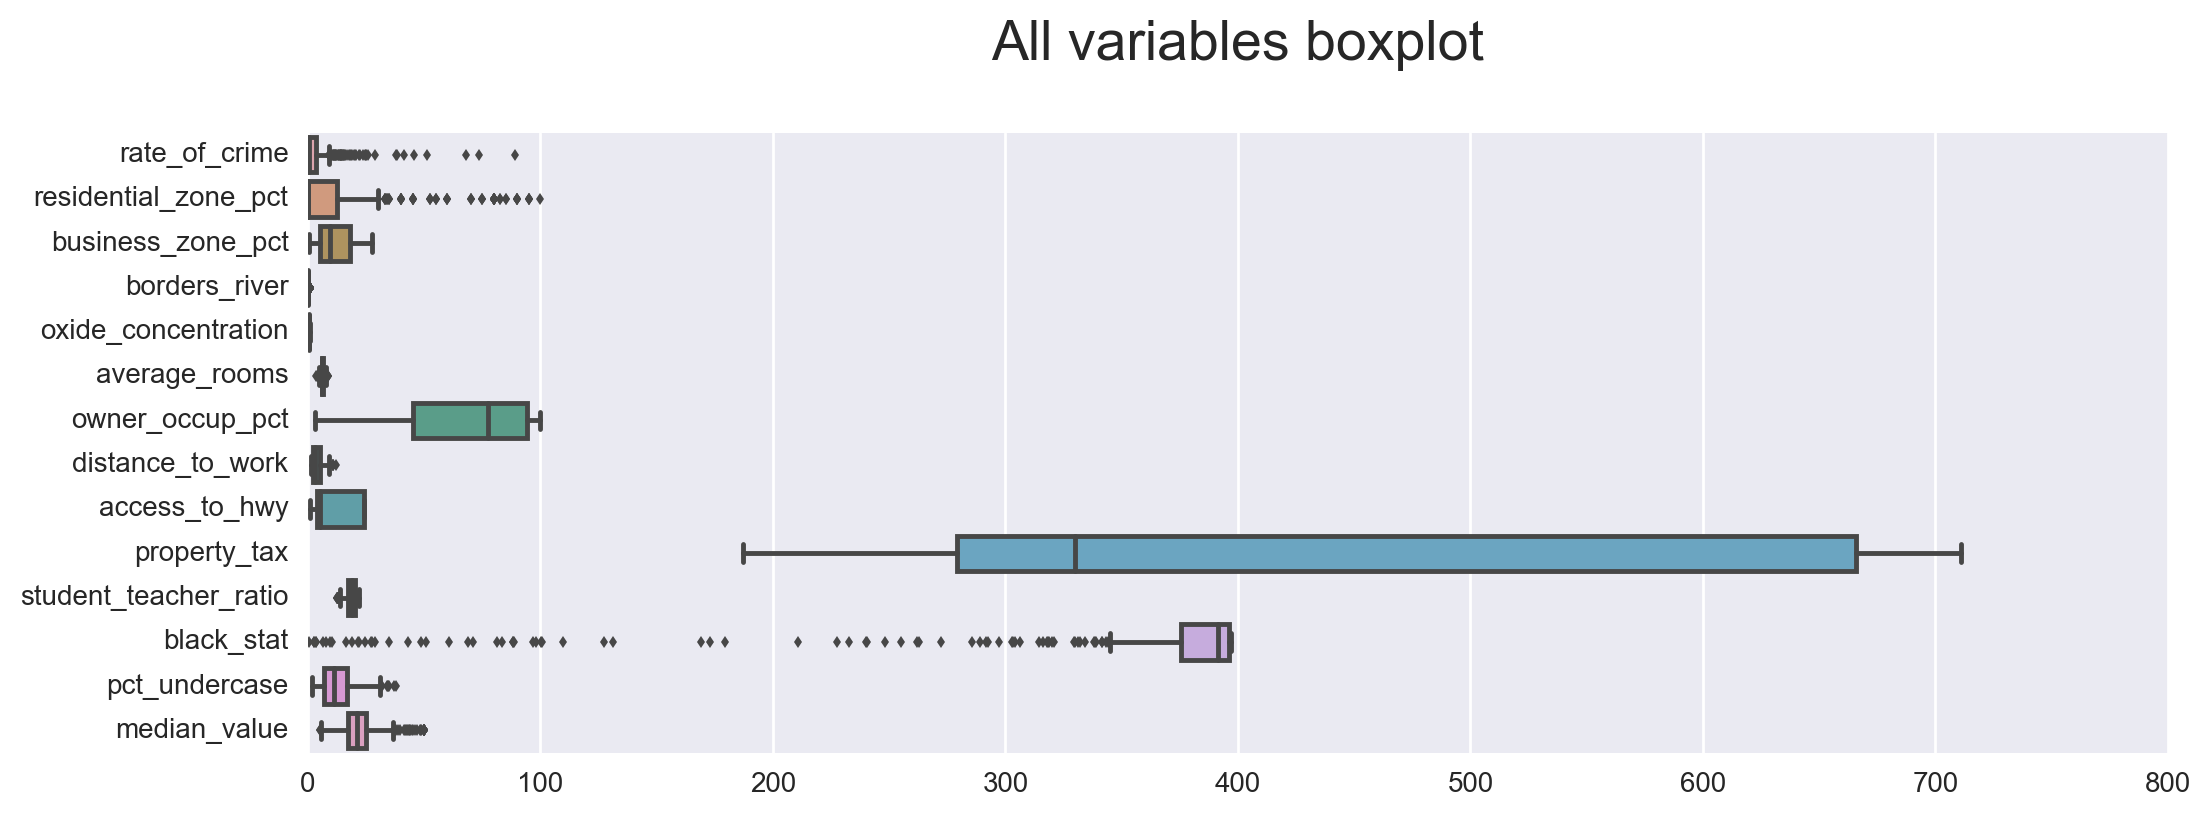

In [41]:
fig, axis1 = plt.subplots(1, 1, figsize=(12,4)) #figsize = (Width, Hight)

#If there is a single axis, no need to assign axis array
#axis1 = axis1

axis1 = sns.boxplot(data=boston, orient='h', fliersize=3, saturation=0.5, ax = axis1)

axis1.set_title('All variables boxplot\n', fontsize=20)
                    
plt.show()


---

## 5. Rescaling variables and plotting again.

Rescaling of variables is very common, and in fact when we get to regularization in models during upcoming weeks the rescaling procedure is actually going to become essential for the regularization to work.

Let's rescale the variables using a procedure called "standardization" or alternatively "normalization".

Normalization is a concise process:

    normalized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
What does this do, exactly? It forces the variable's values to have a mean of 0 and a standard deviation of 1. Nothing else is changed about the distribution of the variable. It doesn't become "normal" or anything. 

### 5.1 Extract rate of crime and plot the distribution 

Also print out the mean and standard deviation of the original variable.

In [45]:
roc_series = boston['rate_of_crime'] #Returns a Pandas Series
roc_numpy = boston['rate_of_crime'].values #Returns a Numpy Array

In [46]:
roc_series.head()

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: rate_of_crime, dtype: float64

Normalize the rate_of_crime variable and plot again. Notice the new mean is centered at 0.

In [ ]:
roc_normed = (roc_numpy - roc_numpy.mean()) / roc_numpy.std()
roc_normed[0:10]

In [48]:
boston_normed = (boston - boston.mean()) / boston.std() 
#subtract the mean of every column from every 
#element in columns then devide every one of those elements by the std of every column
boston_normed.head()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,distance_to_work,access_to_hwy,property_tax,student_teacher_ratio,black_stat,pct_undercase,median_value
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


Print the normalized variable with outliers removed. Let's set the criteria for outliers to be any values that are above 4 * the std_dev of the variable (which is now just 4, since we have forced the standard deviation to be 1 through normalization!)

<function matplotlib.pyplot.show>

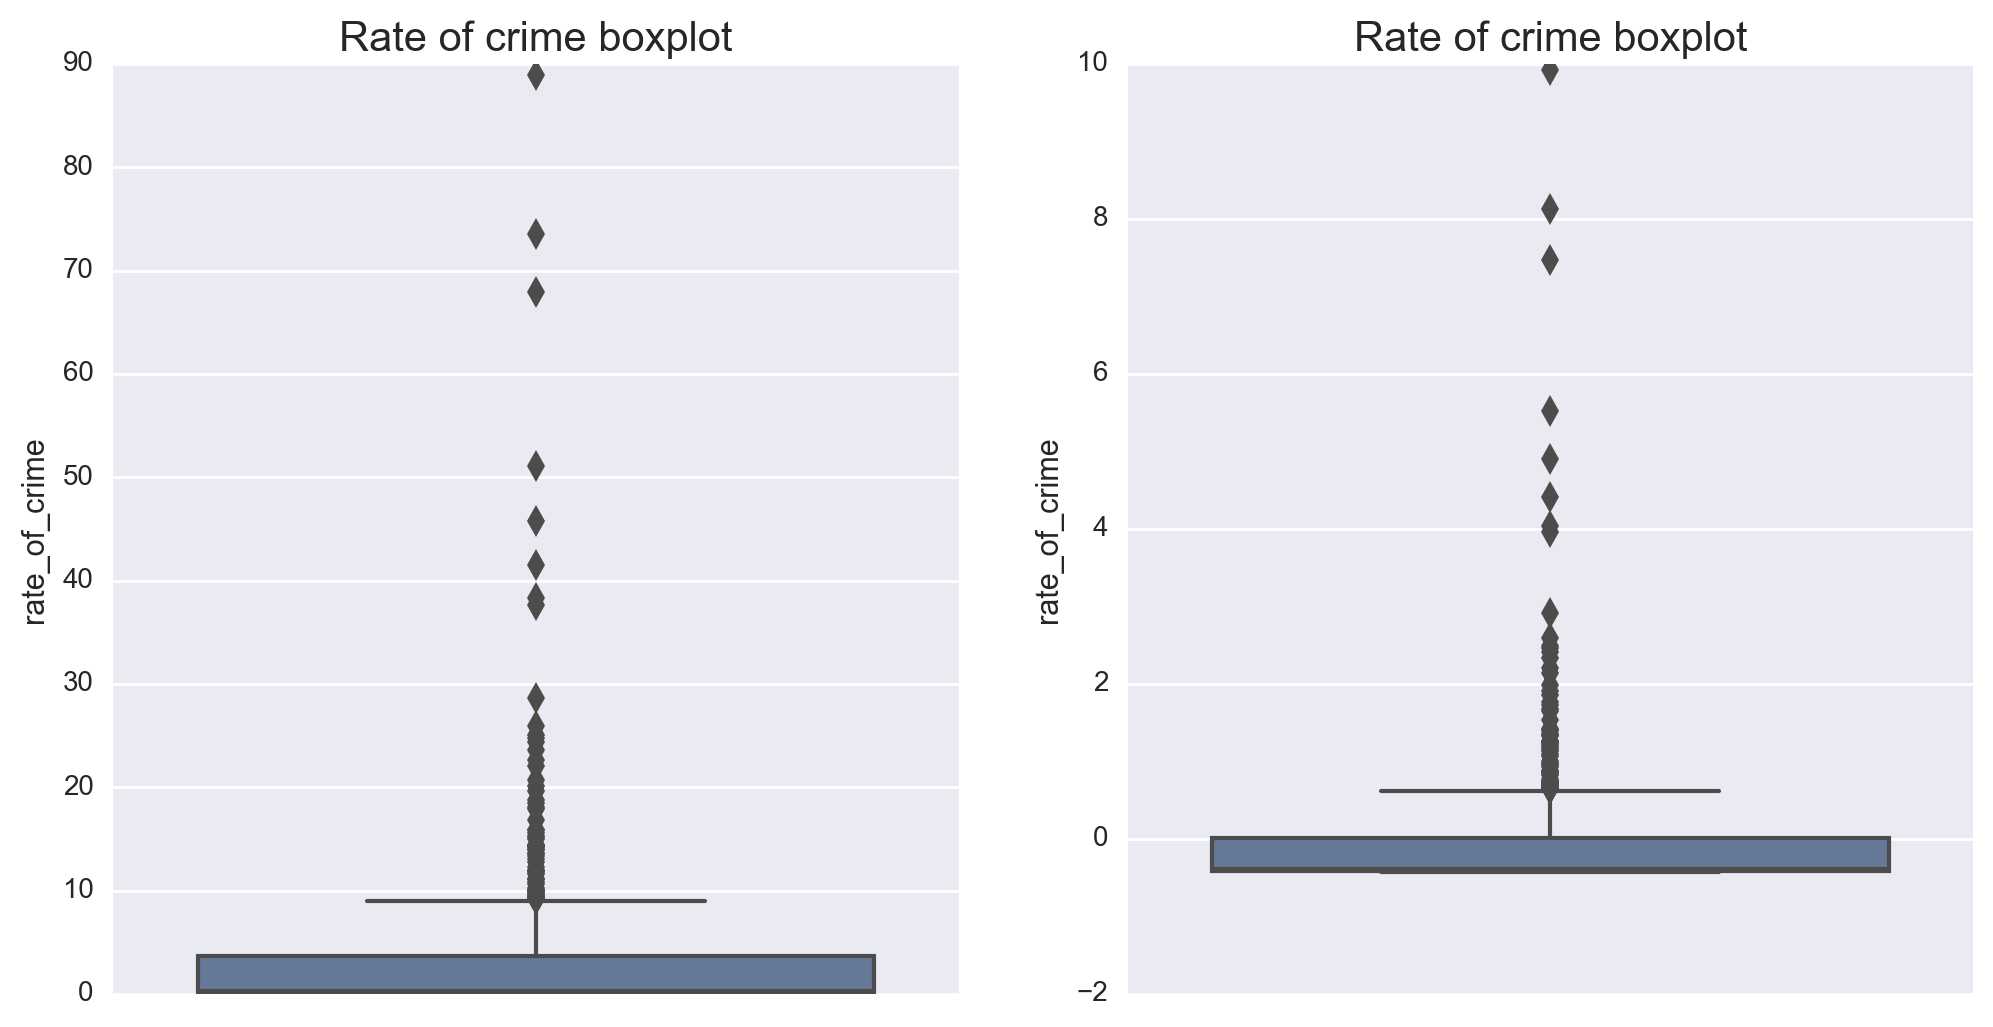

In [52]:
#Using Seaborn to use boxplot
fig, ax_arr = plt.subplots(1,2,figsize=(12,6), sharey=False) #returns figure and ax_arr. sharey=Share Y

#axis reference is done via keyword arg 'ax' and referenced to ax_arr
ax0 = sns.boxplot(boston['rate_of_crime'], orient='v', fliersize=8, linewidth=1.5, saturation=0.5, ax=ax_arr[0])
ax1 = sns.boxplot(boston_normed['rate_of_crime'], orient='v', fliersize=8, linewidth=1.5, saturation=0.5, ax=ax_arr[1])

ax0.set_title('Rate of crime boxplot', fontsize=15)
ax1.set_title('Rate of crime boxplot', fontsize=15)

plt.show

---

## 6. Normalize all the variables and plot the full boxplot again.

Pandas DataFrames actually make it extremely easy to normalize columns all at once. Say we have a DataFrame `data`, then we can normalize all the columns like so:

    data_norm = (data_norm - data.mean()) / data.std()

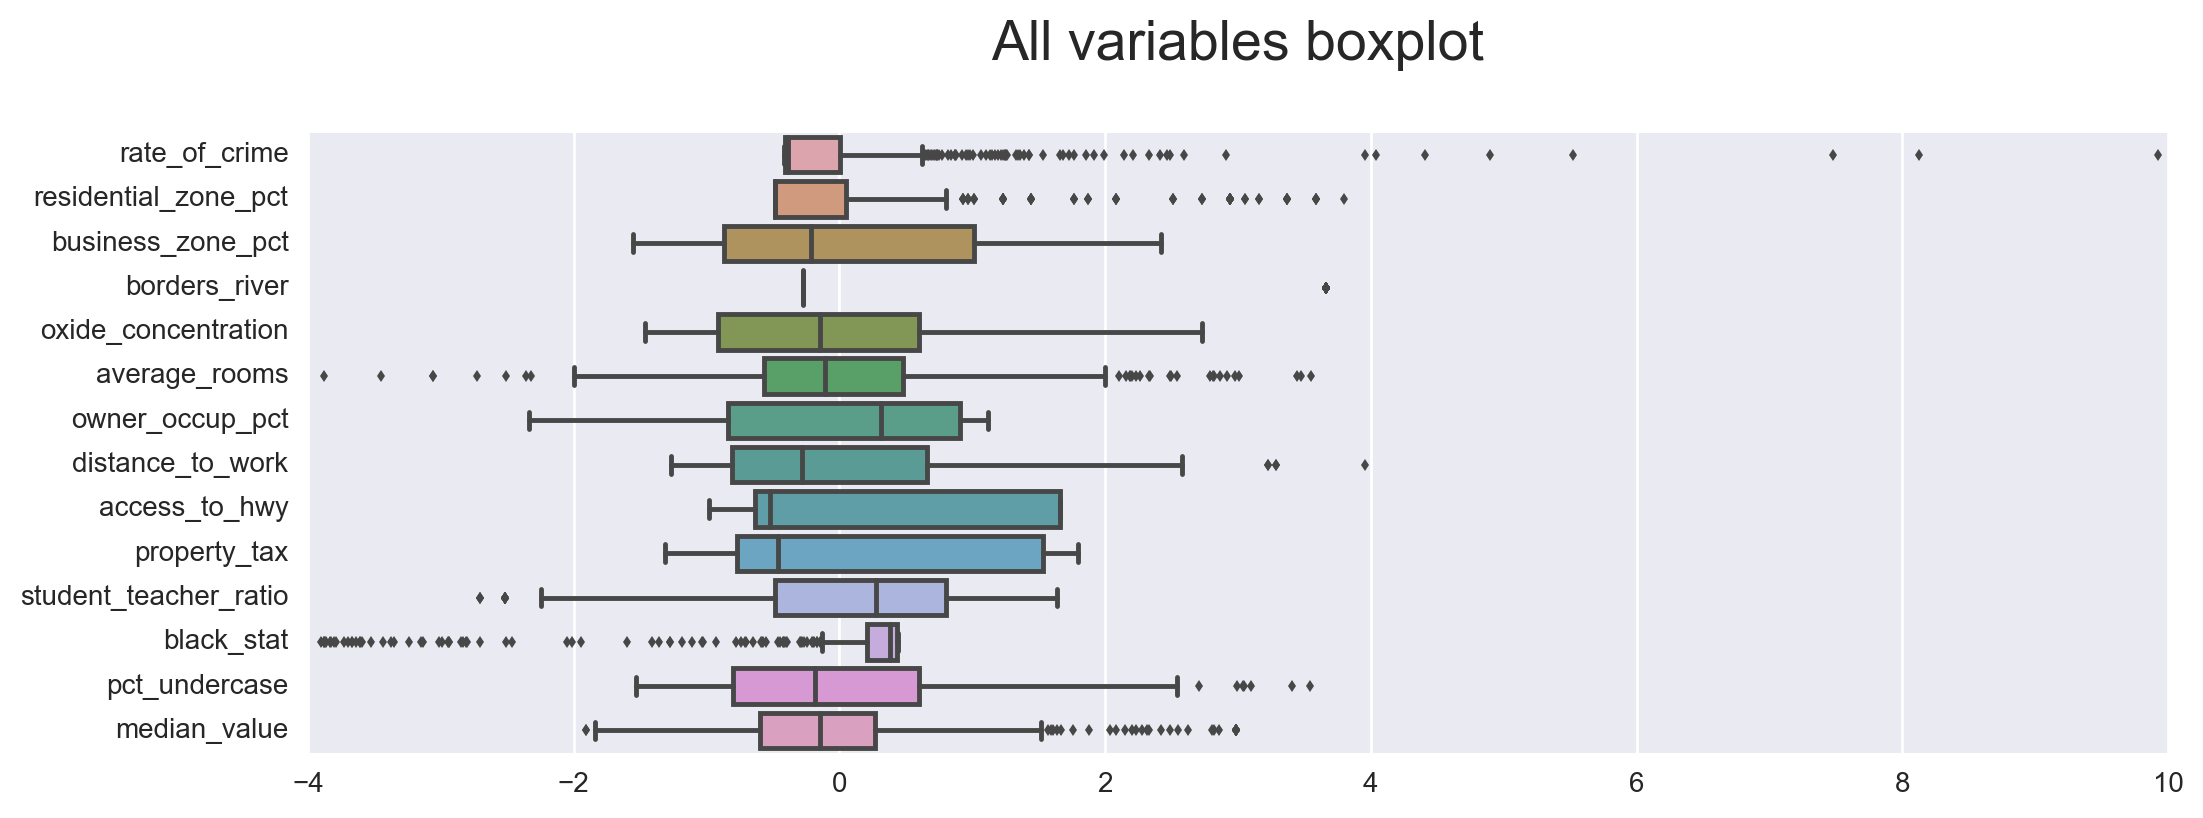

In [53]:
fig, axis1 = plt.subplots(1, 1, figsize=(12,4)) #figsize = (Width, Hight)

#If there is a single axis, no need to assign axis array
#axis1 = axis1

axis1 = sns.boxplot(data=boston_normed, orient='h', fliersize=3, saturation=0.5, ax = axis1)

axis1.set_title('All variables boxplot\n', fontsize=20)
                    
plt.show()

---

## 6. Covariance and correlation of variables

A great way to immediately get a feel for relationships between your variables is with a correlation matrix.

Let's first examine the covariance and the correlation and calculate these by hand.

### 6.1 Covariance of variables

Given sample size $N$ variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$

The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of $X$ times deviations from the mean of $Y$ adjusted by the sample size $N$.

Code the covariance between `pct_underclass` and `home_median_value` below by hand. Verify that you got the correct result using `np.cov()`. Set the keyword argument `bias=True` in `np.cov()` to have it use the same covariance calculation.

Note: `np.cov` returns a covariance _matrix_, which will be each values covariance with itself and the other variable in matrix format.

### 6.2 Correlation of variables

What's the problem with covariance? Well, its not very interpretable. The values are difficult to read because they are relative to the variance of the variables.

A much more common metric, and one easily calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

What the pearson correlation does is in fact directly related to what we did above during the normalization procedure. We are taking the covariance and dividing it by the product of the standard deviations of X and Y. This adjusts the value we get out by the variance of the variables so that $r$ must fall between -1 and 1.

Calculate the correlation between `pct_under` and `med_value` by hand below. Check that it is the same as `np.corrcoef()` with `bias=True`:


### 6.3 The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

---

## 7. Scatterplots

Choose two variables that appear very related and two variables that appear to be unrelated.

Use seaborns `regplot` to plot a scatter plot between the pairs of variables. `regplot` will also plot a regression line by default – we will go into regressions next week. They are, as you might expect, very related to correlations. You can turn this off with `fit_reg=False` if you want.